# Effect of `vivify`, `arenatype` and `cover`

In [1]:
import subprocess
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the x-axis parameter and its values
x_axis_name = 'arenatype'
x_axis_param = {x_axis_name: ['1', '2', '3']}

parameter_grid = {
    'vivify': ['true', 'false'],
    'cover': ['true', 'false'],
    'eagersubsume': ['true','false'],
    'score': ['true','false'],
}


metrics_patterns = {
    'restarts': r"c restarts:\s+(\d+)",
    'conflicts': r"c conflicts:\s+(\d+)",
    'time': r"c total process time since initialization:\s+(\d+\.\d+)"
}

In [3]:
results = []

for fixed_arenatype in x_axis_param[x_axis_name]:
    for param_name, param_values in parameter_grid.items():
        for param_value in param_values:
            command = f"cadical problem_a1.txt --lucky=false --{x_axis_name}={fixed_arenatype} --{param_name}={param_value}"
            print(f"Running: {command}")

            # Run cadical
            result = subprocess.run(command, shell=True, capture_output=True, text=True)
            output = result.stdout


            result_data = {
                x_axis_name: fixed_arenatype,
                param_name: param_value 
            }

            # Extract metrics from the output
            for metric, pattern in metrics_patterns.items():
                match = re.search(pattern, output)
                if match:
                    result_data[metric] = float(match.group(1)) if '.' in match.group(1) else int(match.group(1))
                else:
                    result_data[metric] = None  

            results.append(result_data)


df = pd.DataFrame(results)

Running: cadical problem_a1.txt --lucky=false --arenatype=1 --vivify=true
Running: cadical problem_a1.txt --lucky=false --arenatype=1 --vivify=false
Running: cadical problem_a1.txt --lucky=false --arenatype=1 --cover=true
Running: cadical problem_a1.txt --lucky=false --arenatype=1 --cover=false
Running: cadical problem_a1.txt --lucky=false --arenatype=1 --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --arenatype=1 --eagersubsume=false
Running: cadical problem_a1.txt --lucky=false --arenatype=1 --score=true
Running: cadical problem_a1.txt --lucky=false --arenatype=1 --score=false
Running: cadical problem_a1.txt --lucky=false --arenatype=2 --vivify=true
Running: cadical problem_a1.txt --lucky=false --arenatype=2 --vivify=false
Running: cadical problem_a1.txt --lucky=false --arenatype=2 --cover=true
Running: cadical problem_a1.txt --lucky=false --arenatype=2 --cover=false
Running: cadical problem_a1.txt --lucky=false --arenatype=2 --eagersubsume=true
Running: cadical pro

In [4]:
def plot_metrics(df, x_axis_param_name, metric_to_plot, grouping_param):
    plt.figure(figsize=(10, 6))

    for group_value in df[grouping_param].unique():
        subset = df[df[grouping_param] == group_value]
        
        plt.plot(subset[x_axis_param_name], subset[metric_to_plot], 
                 marker='o', linestyle='-', 
                 label=f'{grouping_param}: {group_value}')

    plt.title(f"{metric_to_plot.capitalize()} vs {x_axis_param_name.capitalize()} by {grouping_param.capitalize()} Value")
    plt.xlabel(x_axis_param_name.capitalize())
    plt.ylabel(metric_to_plot.capitalize())
    plt.xticks(subset[x_axis_param_name])
    plt.legend(title=grouping_param.capitalize())
    plt.grid()
    plt.tight_layout()
    plt.show()

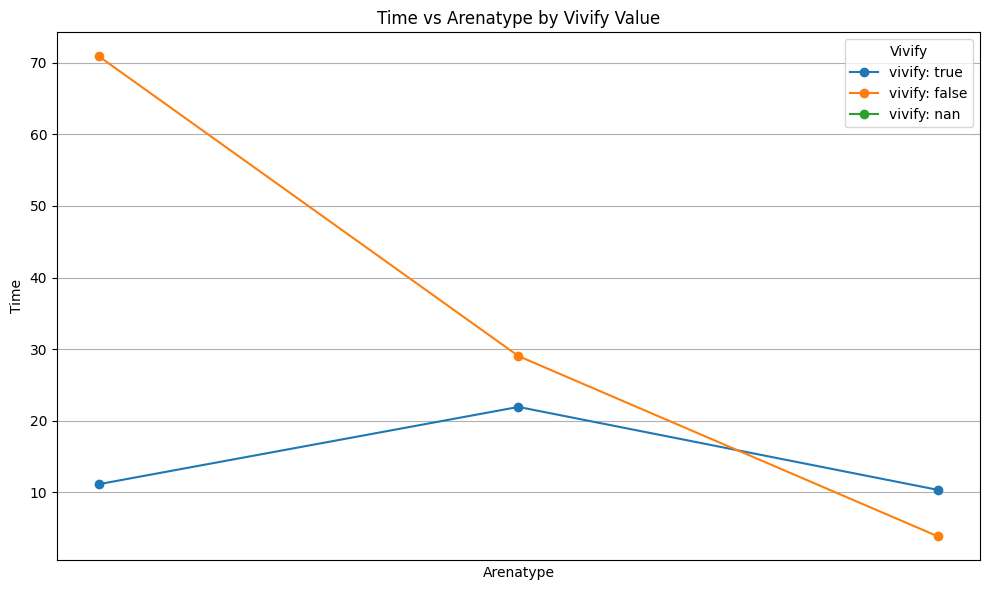

In [5]:
plot_metrics(df, x_axis_name, 'time','vivify')

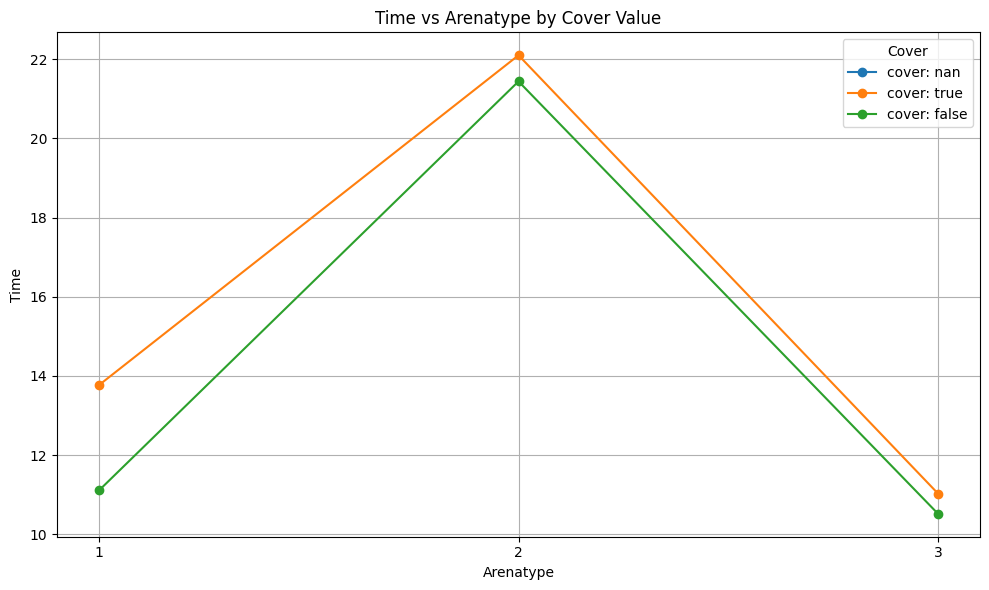

In [6]:
plot_metrics(df, x_axis_name, 'time','cover')

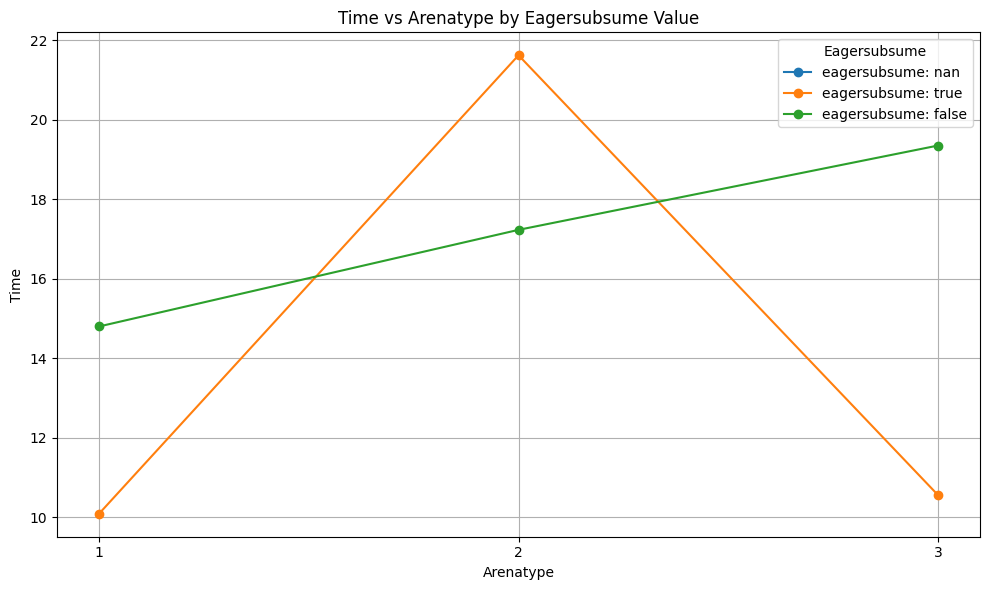

In [7]:
plot_metrics(df, x_axis_name, 'time','eagersubsume')

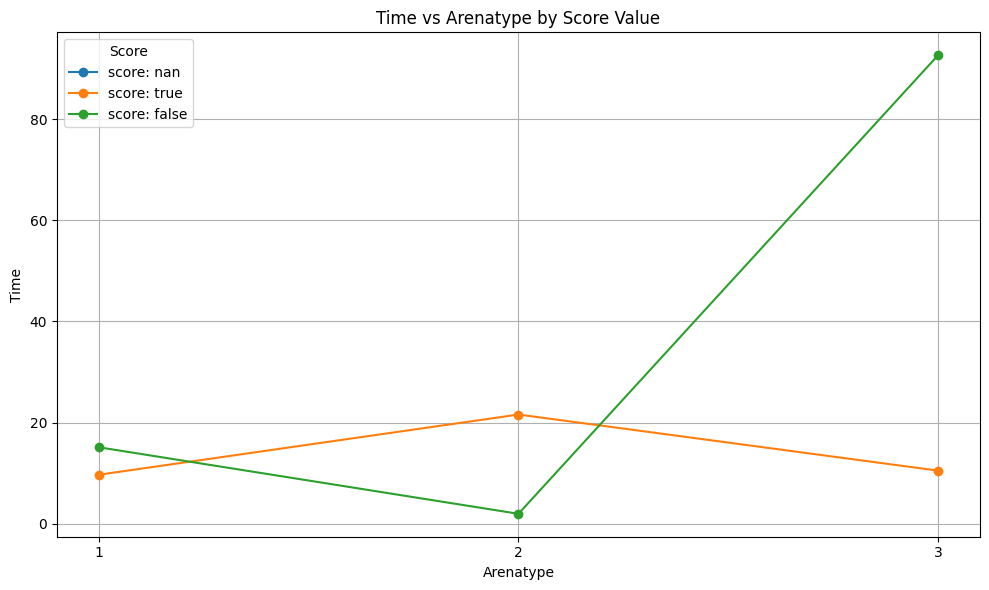

In [8]:
plot_metrics(df, x_axis_name, 'time','score')

In [14]:
def compute_sat(param, values):
    results = []
    for value in values:
        command = f"cadical problem_a1.txt --lucky=false --{param}={value} --arenatype=3 --vivify=false --eagersubsume=true"
        print(f"Running: {command}")

        # Run cadical
        result = subprocess.run(command, shell=True, capture_output=True, text=True)        
        output = result.stdout

        # Check if the problem is SAT or UNSAT
        sat = "s SATISFIABLE" in output
        unsat = "s UNSATISFIABLE" in output

        if unsat:
            print(f"Waring: The problem is UNSAT for {param}={value}")

        result_data = {
            param: value
        }

        # Extract metrics from the output
        for metric, pattern in metrics_patterns.items():
            match = re.search(pattern, output)
            if match:
                result_data[metric] = float(match.group(1)) if '.' in match.group(1) else int(match.group(1))
            else:
                result_data[metric] = None
    
        results.append(result_data)
    
    return pd.DataFrame(results)

In [10]:
def plot_sat(df, param, metric_to_plot):
    plt.figure(figsize=(10, 6))
    plt.plot(df[metric_to_plot], df[param], marker='o', linestyle='-')
    plt.title(f"{param.capitalize()} vs {metric_to_plot.capitalize()}")
    plt.xlabel(metric_to_plot.capitalize())
    plt.ylabel(param.capitalize())
    plt.grid()
    plt.tight_layout()
    plt.show()

In [17]:
params = {
    'flushfactor': range(1,1001,9),
    'scorefactor': range(500,1001,10)
}

for param, values in params.items():
    df_param = compute_sat(param, values)
    df = pd.concat([df, df_param])

Running: cadical problem_a1.txt --lucky=false --flushfactor=1 --arenatype=3 --vivify=false --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --flushfactor=10 --arenatype=3 --vivify=false --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --flushfactor=19 --arenatype=3 --vivify=false --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --flushfactor=28 --arenatype=3 --vivify=false --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --flushfactor=37 --arenatype=3 --vivify=false --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --flushfactor=46 --arenatype=3 --vivify=false --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --flushfactor=55 --arenatype=3 --vivify=false --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --flushfactor=64 --arenatype=3 --vivify=false --eagersubsume=true
Running: cadical problem_a1.txt --lucky=false --flushfactor=73 --arenatype=3 --vivify=false --eagersubsum

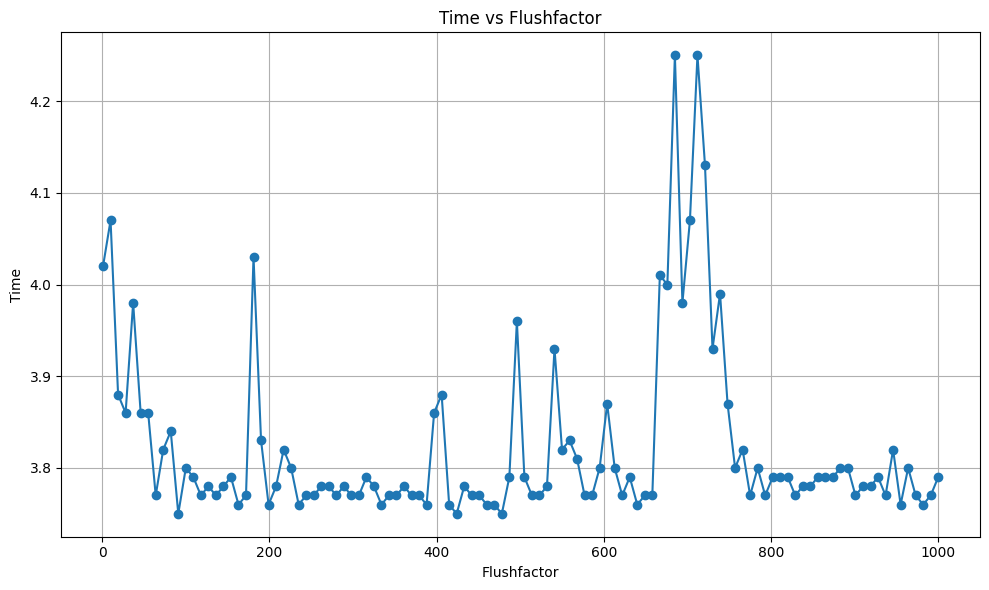

In [18]:
plot_sat(df, 'time', 'flushfactor')

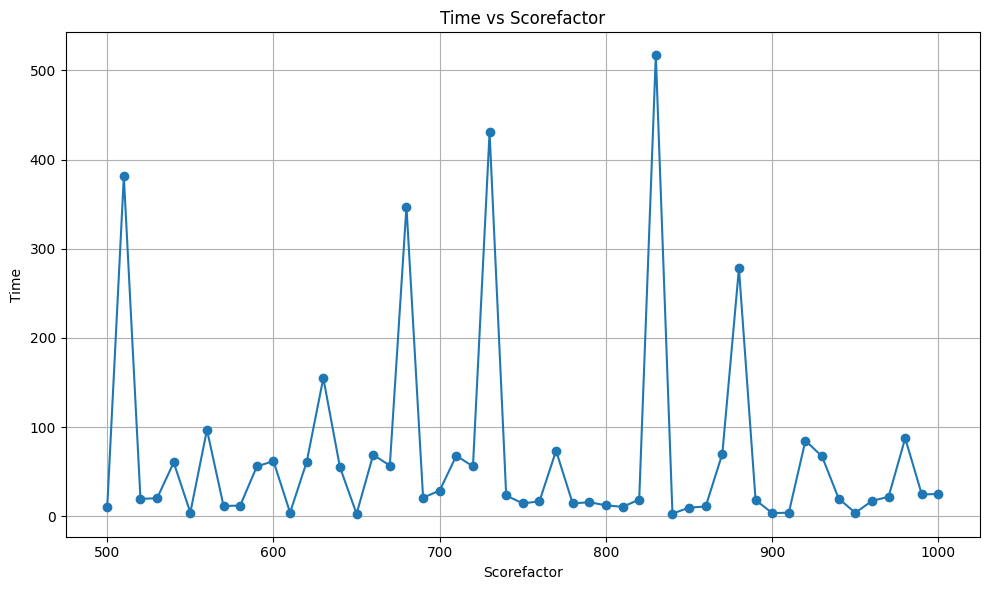

In [19]:
plot_sat(df, 'time', 'scorefactor')